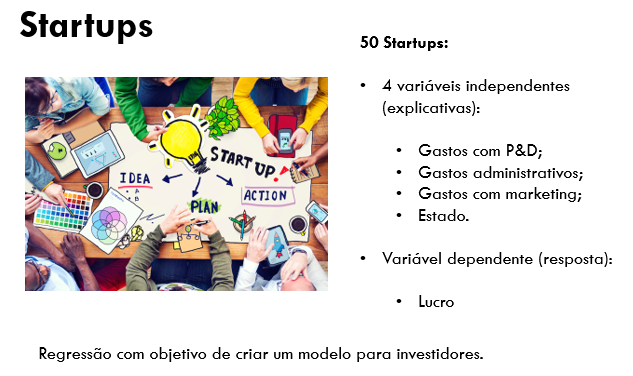


In [1]:
# mape incluído na versão 0.24 (quando colab atualizar, não preisaremos mais desta célula)
!pip install -U scikit-learn

## Carregar base de Dados

In [2]:
# Importação dos pacotes
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import f_regression

# Seed para reprodução de resultados
seed = 10
random.seed(seed)
np.random.seed(seed)

In [3]:
data = pd.read_csv('50_Startups.csv', index_col=0)
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
ID,,,,,
1,165349.20,136897.80,471784.10,New York,192261.83
2,162597.70,151377.59,443898.53,California,191792.06
3,153441.51,101145.55,407934.54,Florida,191050.39
4,144372.41,118671.85,383199.62,New York,182901.99
5,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data.shape

(50, 5)

In [5]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


## Dummy Coding

In [6]:
data = pd.get_dummies(data, columns=['State'], drop_first=True)
data.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
ID,,,,,,
1,165349.20,136897.80,471784.10,192261.83,0,1
2,162597.70,151377.59,443898.53,191792.06,0,0
3,153441.51,101145.55,407934.54,191050.39,1,0
4,144372.41,118671.85,383199.62,182901.99,0,1
5,142107.34,91391.77,366168.42,166187.94,1,0


## Separar base em treino e teste

In [7]:
from sklearn.model_selection import train_test_split 
# Agora usaremos a função para fazer de fato a separação. 
# Já faremos a separação em treino e teste e entrada e saída.
X = data.loc[:,data.columns != 'Profit']  # Entrada
y = data.Profit    # Saída
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
# Vamos olhar os shapes da bases de treino e teste
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(40, 5)
(10, 5)
(40,)
(10,)


##Machine Learning

In [9]:
# treinar modelo
from sklearn.linear_model import LinearRegression

def train_and_predict(X_train, y_train, X_test):
  model = LinearRegression(normalize=True)
  model.fit(X_train, y_train);
  y_pred = model.predict(X_test) #inferência do teste
  return model, y_pred

model, y_pred = train_and_predict(X_train, y_train, X_test)

### Avaliar modelo treinado na base de teste

In [10]:
def evaluate(y_test, y_pred, X_test):  

  # MAPE
  from sklearn.metrics import mean_absolute_percentage_error
  mape = mean_absolute_percentage_error(y_test, y_pred)
  print('MAPE: ', mape)

  # R2
  from sklearn.metrics import r2_score
  r2 = r2_score(y_test, y_pred)
  print('R2: ', r2)

  n = len(y_test)
  p = X_test.shape[1]
  adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
  print('R2 ajustado: ', adj_r2)

evaluate(y_test, y_pred, X_test)

MAPE:  0.02928635835956611
R2:  0.9901105113397771
R2 ajustado:  0.9777486505144986


In [11]:
# Modelo gerado
print(model.intercept_)
print(model.coef_)

50085.8383534856
[ 8.05859453e-01 -1.79706621e-02  2.28153524e-02  6.11345435e+02
 -8.63652373e+02]


Profit = 50085.8383534856 + 8.05859453e-01\*R&D Spend + -1.79706621e-02\*Administration +  2.28153524e-02\*Marketing Spend +  6.11345435e+02\*State_Florida + -8.63652373e+02\*State_New York		

In [12]:
# Se p_value > 0.05, o atributo pode não ser uma boa adição pro modelo
_, pval = f_regression(X_train, y_train)
pval

array([3.34000140e-24, 1.94612100e-01, 3.58901311e-08, 5.56073942e-01,
       6.72914598e-01])

## Backward Elimination

###Retirar State

In [13]:
X_train_1 = X_train.iloc[:, 0:3]
X_test_1 = X_test.iloc[:, 0:3]

In [14]:
# Gerar modelo e testar novamente
model_1, y_pred_1 = train_and_predict(X_train_1, y_train, X_test_1)
evaluate(y_test, y_pred_1, X_test_1)

MAPE:  0.026295866000794497
R2:  0.9917459017235682
R2 ajustado:  0.9876188525853524


In [15]:
_, pval = f_regression(X_train_1, y_train)
pval

array([3.34000140e-24, 1.94612100e-01, 3.58901311e-08])

###Retirar ADM

In [16]:
X_train_2 = X_train.iloc[:, [0,2]]
X_test_2 = X_test.iloc[:, [0,2]]

In [17]:
# Gerar modelo e testar novamente
model_2, y_pred_2 = train_and_predict(X_train_2, y_train, X_test_2)
evaluate(y_test, y_pred_2, X_test_2)

MAPE:  0.02992156998302014
R2:  0.9909864896179558
R2 ajustado:  0.9884112009373717


In [18]:
_, pval = f_regression(X_train_2, y_train)
pval

array([3.34000140e-24, 3.58901311e-08])

###Retirar Marketing

In [19]:
X_train_3 = pd.DataFrame(X_train.loc[:,'R&D Spend'])  # coloca em um dataframe para manter duas dimensões e não dar erro no treinamento
X_test_3 = pd.DataFrame(X_test.loc[:,'R&D Spend'])

In [20]:
# Gerar modelo e testar novamente
model_3, y_pred_3 = train_and_predict(X_train_3, y_train, X_test_3)
evaluate(y_test, y_pred_3, X_test_3)

MAPE:  0.048301887923735215
R2:  0.9838806265684715
R2 ajustado:  0.9818657048895305


In [21]:
_, pval = f_regression(X_train_3, y_train)
pval

array([3.3400014e-24])

## Modelo com maior R2 ajustado: model_2

Parâmetros do modelo ajustado

In [22]:
# intercepto 
model_2.intercept_

47662.77046436914

In [23]:
# coeficientes
model_2.coef_

array([0.79827194, 0.02581271])

Modelo:

Profit = 47662.77046436914 + 0.79827194 * R&D Spend + 0.02581271 *	Marketing Spend

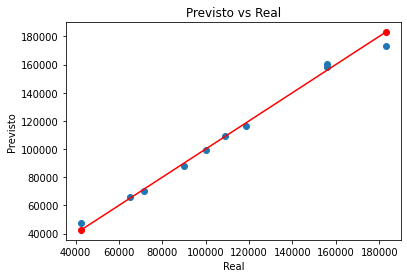

In [24]:
#previsto vs. real
plt.scatter(x=y_test, y=y_pred_2)
plt.title('Previsto vs Real')
plt.xlabel('Real')
plt.ylabel('Previsto')

x = [min(y_test), max(y_test)]
plt.plot(x, x, 'bo-',color='red'); #reta onde y=x